# Meta SAM (Segment Anything Model) with Maps

Autor: Mayte Toscano

Using Meta AI SAM to digitize a map and transform it to geopackage.
Imagen url:
https://drive.google.com/file/d/1cGjTvjMHgXMPurpu0g9zV8BdVzGXxgY2/view?usp=share_link



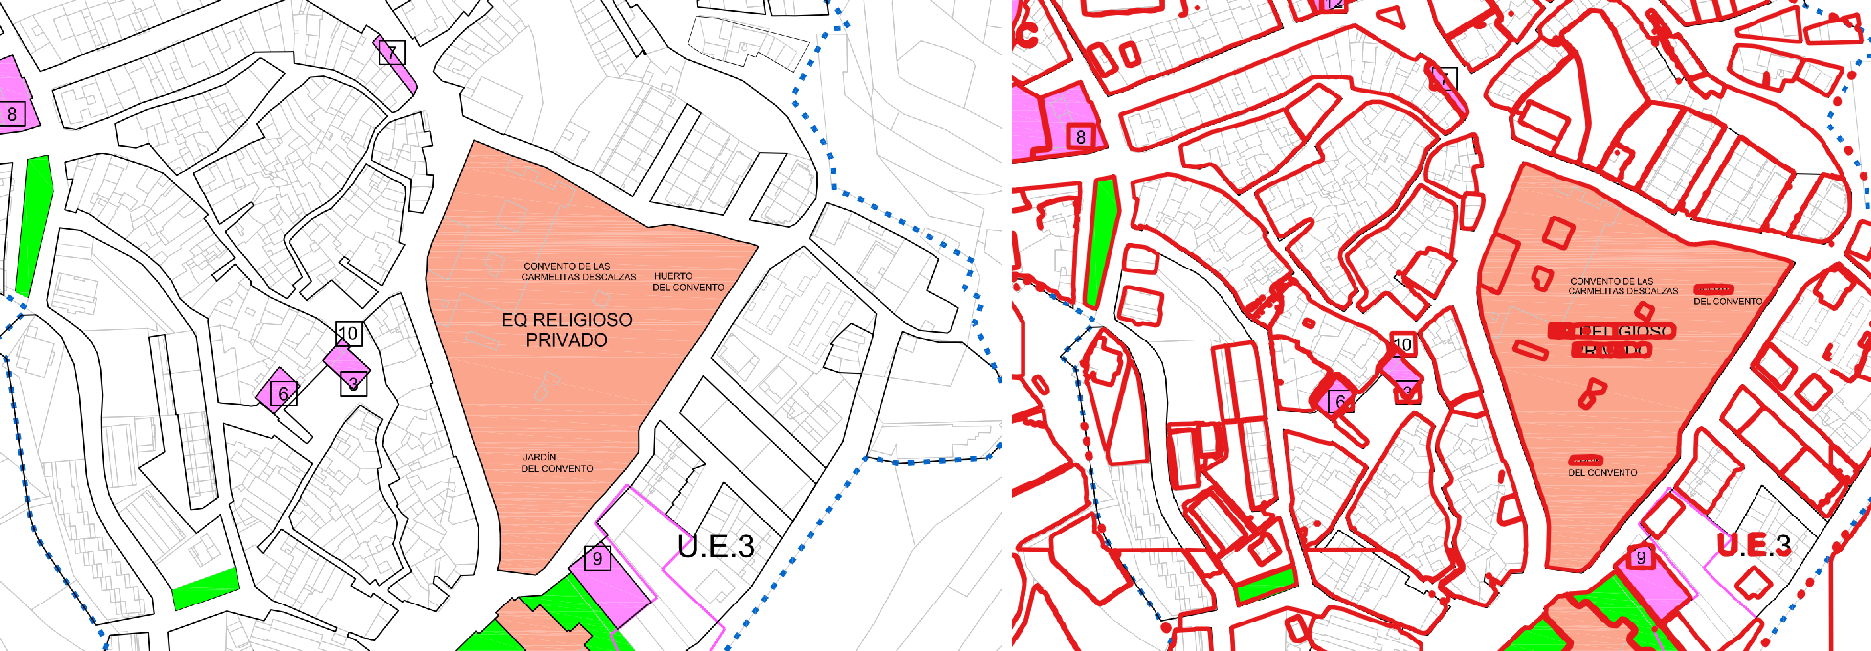

## Library

In [ ]:
%pip install segment-geospatial  # Se instala la primera vez
!pip install -q jupyter_bbox_widget roboflow dataclasses-json supervision
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize


In [ ]:
import os
import torch
from samgeo import SamGeo, tms_to_geotiff
import cv2
import supervision as sv
import psutil
import humanize
import GPUtil as GPU
  

In [ ]:
%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights

!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

[Errno 2] No such file or directory: '{HOME}'
/content
mkdir: cannot create directory ‘{HOME}/weights’: No such file or directory
[Errno 2] No such file or directory: '{HOME}/weights'
/content


## Star SAM  

In [ ]:
out_dir = os.path.join(os.path.expanduser('~'), 'Downloads')
checkpoint = os.path.join(out_dir, 'sam_vit_h_4b8939.pth')

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
sam = SamGeo(
    checkpoint=checkpoint,
    model_type='vit_h',
    device=device,
    erosion_kernel=(3, 3),
    mask_multiplier=255,
    sam_kwargs=None,
)

## Load the Map

In [ ]:
image = 'CASCO.tif'

## SAM

In [ ]:
mask = 'resultado_casco.tif'
sam.generate(image, mask)


100%|██████████| 140/140 [15:42<00:00,  6.73s/it]


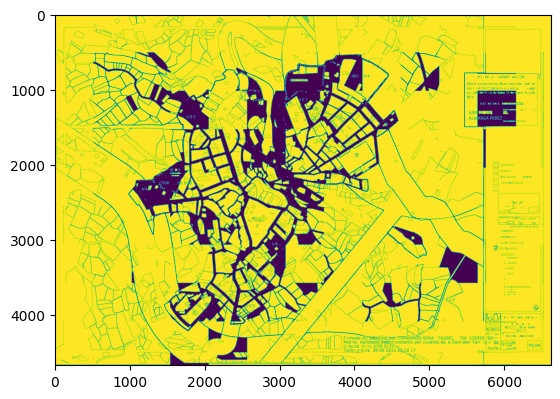

In [ ]:
import matplotlib.pyplot as plt
image = plt.imread(mask)
plt.imshow(image)
plt.show()

## Export to GeoPackage



In [ ]:
vector = 'resultado.gpkg'
crs = "EPSG:4326"  
sam.tiff_to_gpkg(mask, vector, simplify_tolerance=None)

## Export to Shaperfile

In [ ]:
shapefile = 'resultado.shp'
sam.tiff_to_vector(mask, shapefile)